The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

N - 1000(N - 0.63)^2 where N is the proportion of Non-Americans by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


The target is MEDV (Median value of owner-occupied homes)

In [2]:
#I will use deep learning method and for scaling will use minmaxscaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
#firt of all i will make the dataset ready to model.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'N', 'LSTAT', 'MEDV']
housing = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", header=None, delimiter=r"\s+", names=column_names)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,N,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#dimension of the dataset
print(np.shape(housing))

(506, 14)


In [4]:
# summarized statistics of data
print(housing.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           N  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

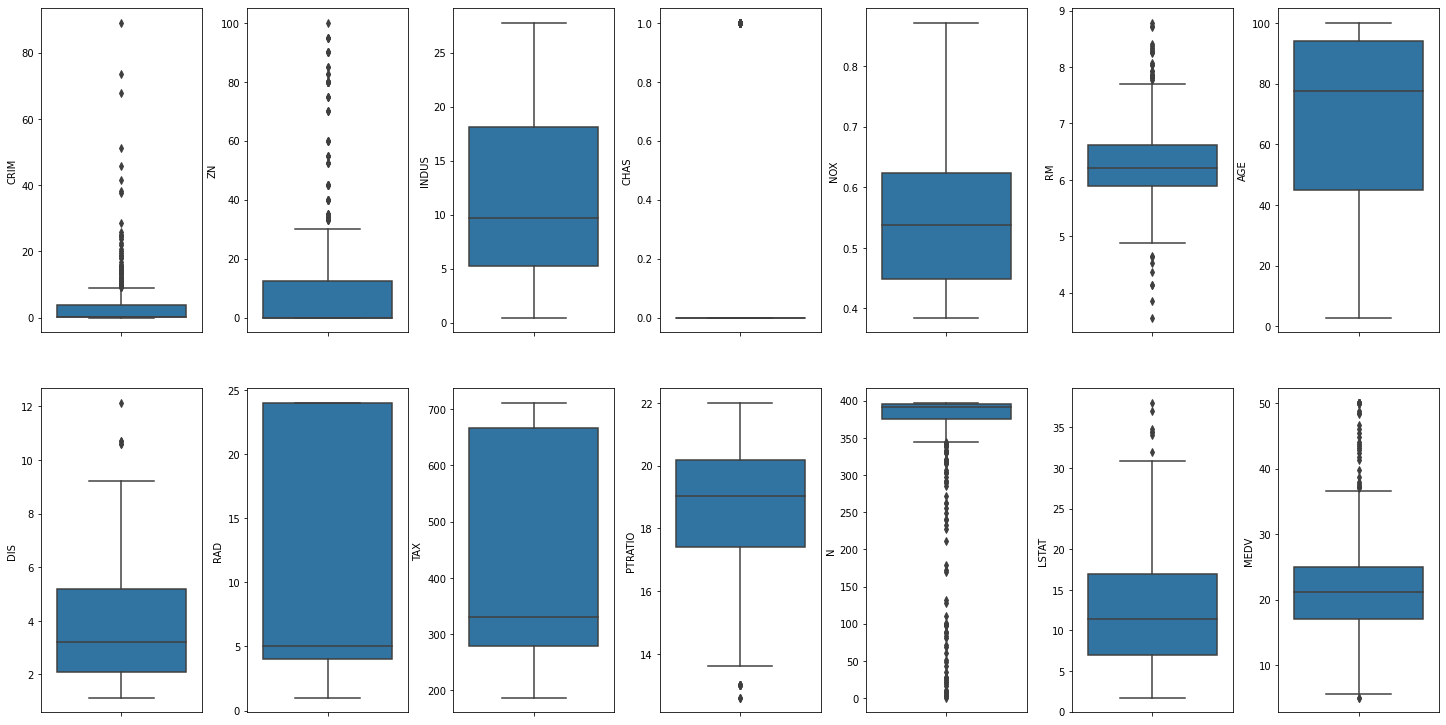

In [5]:
#while prediction of MEDV , the columns ZN and CHAS is not necessary 
#and in the features above 50.00 in MEDV columns are not necessary 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing.items():
    sns.boxplot(y=v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
    for k, v in housing.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(housing)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    
#there are outliers in the columns CRIM,ZN,RM and B seemed in the graphs above. 
#lets see the percentages of them

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column N outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [7]:
#lets remove features of MEDV columns below 50
housing = housing[~(housing['MEDV'] >= 50.0)]
print(np.shape(housing))

(490, 14)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

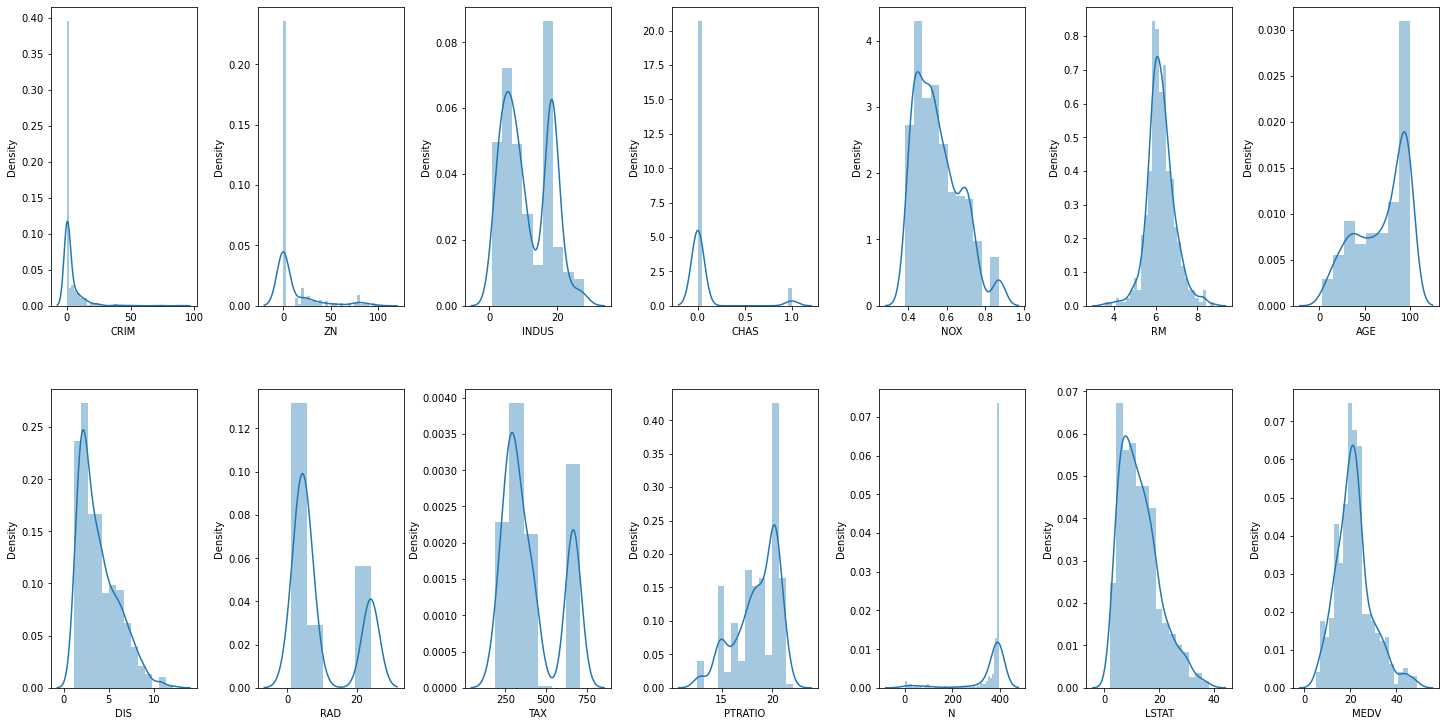

In [8]:
#lets see the new graphs as plot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

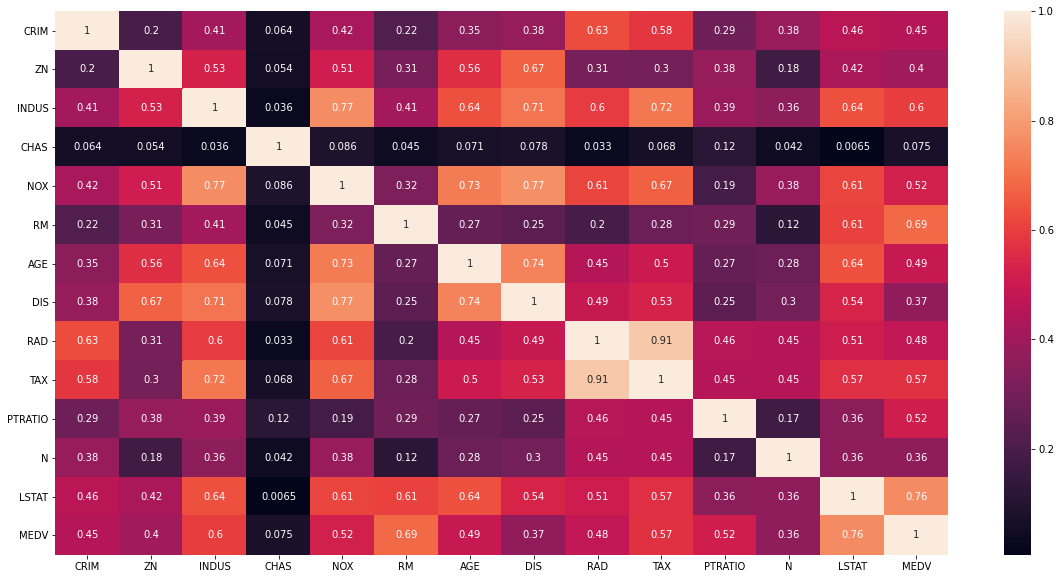

In [9]:
#lets see the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(housing.corr().abs(),  annot=True)

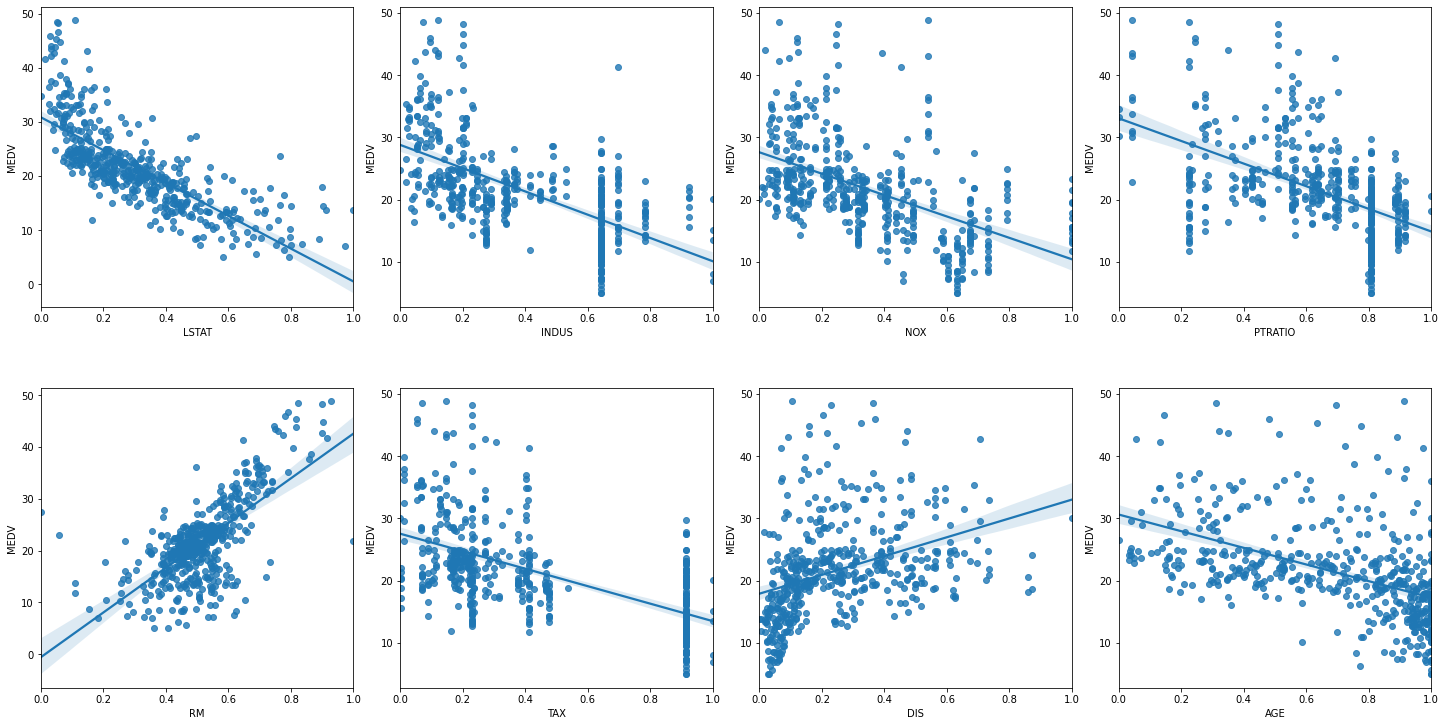

In [10]:
#in the matrix above it is seemed that TAX and RAD coloumns are highly correlated but LSTAT,INDUS,RM,TAX,NOX,PTRAIO columns have low correlation.
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = housing.loc[:,column_sels]
y = housing['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
#lets remove the skewness of the data
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [12]:
#starting the model. split the train and test datas. after that i will make fit transfer at the same time
from sklearn.model_selection import train_test_split

train_test_split(housing, y)
x_train, x_test, y_train, y_test = train_test_split(housing, y, train_size = 0.8, random_state = 20)
scaler = MinMaxScaler((-1,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.linear_model import ElasticNet

# we use elastic net. alpha is the total penalty parameter and l1_ratio is the proportion of alpha to be given to l1 norm
elastic = ElasticNet(alpha = 0.05 , l1_ratio= 0.5, max_iter = 1000) 

#fit the model with train data. 
model = elastic.fit(x_train,y_train)

#R2 is the default scoring method for linear regression
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)

print("R2 Score for train data is ", r2_train)
print("R2 Score for test data is ", r2_test)
model.coef_ 

R2 Score for train data is  0.868547871707035
R2 Score for test data is  0.8850638965834137


array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.01345814, -0.0648132 ,
       -0.        ,  0.        , -0.15926476,  0.48953503])

In [14]:
# import ridge from linear model
from sklearn.linear_model import Ridge

# we use ridge instead of linear regression. 
ridge = Ridge(alpha = 0.3) 


#column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
#x = housing.loc[:,column_sels]
#y = housing['MEDV']


#fit the model with train data. 
model = ridge.fit(x_train,y_train)

#R2 is the default scoring method for linear regression
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)

print("R2 Score for train data is ", r2_train)
print("R2 Score for test data is ", r2_test)
model.coef_

R2 Score for train data is  0.961792809129276
R2 Score for test data is  0.9612961184754283


array([-0.23496016, -0.01711102,  0.03623207,  0.01048149, -0.03312789,
       -0.11915655,  0.01638582,  0.02444152,  0.02965897, -0.03180949,
       -0.00648426,  0.01072576, -0.15562755,  0.8433402 ])

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
#fit the model with train data. 
model = lr.fit(x_train,y_train)

#R2 is the default scoring method for linear regression
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)

print("R2 Score for train data is ", r2_train)
print("R2 Score for test data is ", r2_test)
linear_coef = model.coef_
linear_coef

R2 Score for train data is  0.9618936835953406
R2 Score for test data is  0.9615138757488355


array([-0.23698779, -0.01817359,  0.03731207,  0.01026284, -0.03084875,
       -0.13217864,  0.0184883 ,  0.03067278,  0.02892417, -0.02940796,
       -0.00325192,  0.00895642, -0.15248391,  0.86346183])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_transformed = scaler.fit_transform(x_train)

In [17]:
from sklearn.linear_model import SGDRegressor
#lets first train a linear regression model
#try: alpha=0, max_iter = 10000
#predictor = SGDRegressor(alpha=0) 

predictor = SGDRegressor(alpha=0, max_iter = 10000) 


#fit the model with train data. 
model = predictor.fit(x_train_transformed,y_train)

x_test_transformed = scaler.transform(x_test)

#R2 is the default scoring method for linear regression
r2_train = model.score(x_train_transformed,y_train)
r2_test = model.score(x_test_transformed,y_test)

print("R2 Score for train data is ", r2_train)
print("R2 Score for test data is ", r2_test)
model.coef_

R2 Score for train data is  0.955042237906879
R2 Score for test data is  0.949310441889418


array([-0.05556368, -0.00051393,  0.01187181,  0.00482342, -0.0191971 ,
       -0.00934946, -0.00450081, -0.02106534,  0.03527108, -0.03548803,
       -0.01124148,  0.00879917, -0.08001769,  0.25705891])